# NLP 

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('bbc-text.csv')

In [89]:
df.head()

,category,text
0,business,worldcom boss left books alone former worldc...
1,sport,tigers wary of farrell gamble leicester say ...
2,sport,yeading face newcastle in fa cup premiership s...
3,sport,henman hopes ended in dubai third seed tim hen...
4,sport,wilkinson fit to face edinburgh england captai...


In [90]:
df['category'].value_counts()

sport       511
business    510
Name: category, dtype: int64

### Predict whether the article is a sports article or business articles

Before I try to put this in a machine learning model, I want to do some EDA 

##### What are the most common word in the text document? 

In [91]:
pd.Series(' '.join(df['text']).split()).value_counts().head(25)

the     20447
to       9763
in       7949
a        7275
of       7175
and      6877
s        4218
for      3346
is       3083
it       2866
on       2843
that     2837
was      2338
has      2219
he       2182
i        2117
with     2112
at       2095
but      2038
have     1982
said     1843
be       1820
as       1764
by       1687
will     1680
dtype: int64

##### What are the 25 most common words in a sports document? 

In [92]:
pd.Series(' '.join(df[df['category'] == 'sport']['text']).split()).value_counts().head(25)

the     9639
to      4695
a       3861
and     3678
in      3629
of      2800
s       2191
i       1992
for     1744
he      1727
on      1483
is      1479
but     1450
was     1423
it      1410
that    1244
with    1206
at      1170
have    1154
his     1148
we      1052
has      968
be       953
will     895
as       834
dtype: int64

In [93]:
pd.Series(' '.join(df[df['category'] == 'business']['text']).split()).value_counts().head(25)

the     10808
to       5068
of       4375
in       4320
a        3414
and      3199
s        2027
is       1604
for      1602
that     1593
it       1456
on       1360
said     1314
has      1251
its      1100
by       1095
as        930
at        925
was       915
with      906
be        867
from      857
have      828
are       808
-         785
dtype: int64

We see that the same words are the most common (the, to, of in, a, and, is, it, on, etc) in both sports and business documents.  Thats because these are **stop words**.  Stop words are generally the most common words in a language https://en.wikipedia.org/wiki/Stop_words

In [94]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [95]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Add a word to the stopword list 

In [96]:
stop.append('s')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### Lets look at the most common words in the document after stopwords have been removed 

In [97]:
# remove stop words
df['no_stop_words'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [98]:
df.head()

,category,text,no_stop_words
0,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
1,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
2,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
3,sport,henman hopes ended in dubai third seed tim hen...,henman hopes ended dubai third seed tim henman...
4,sport,wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain j...


In [99]:
pd.Series(' '.join(df['no_stop_words']).split()).value_counts().head(25)

said       1843
-          1266
us          959
would       857
also        768
last        741
new         692
year        687
mr          615
first       599
world       598
two         579
one         578
said.       574
could       552
england     478
back        434
time        427
company     405
three       392
game        391
win         380
market      359
firm        353
made        350
dtype: int64

Looks like I need to add `-` to my stop word list and need to remove punctuation 

In [100]:
stop.append('-')

In [101]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [102]:
df['no_stop_words'] = df['no_stop_words'].str.replace('[{}]'.format(string.punctuation), '')

In [103]:
pd.Series(' '.join(df['no_stop_words']).split()).value_counts().head(25)

said       2621
us         1022
year        904
would       859
also        769
last        741
new         701
world       631
mr          615
first       602
one         598
two         582
could       552
england     503
time        486
game        482
back        449
company     428
market      426
win         426
years       424
three       394
growth      384
firm        376
made        361
dtype: int64

##### What are the 25 most common words in a sports document? 

In [104]:
pd.Series(' '.join(df[df['category'] == 'sport']['no_stop_words']).split()).value_counts().head(25)

said       941
game       476
england    459
first      437
win        415
would      396
world      379
last       376
one        355
two        351
also       329
time       327
back       318
players    307
play       292
cup        290
new        285
side       270
ireland    270
year       267
wales      265
team       265
good       258
club       254
second     249
dtype: int64

In [105]:
pd.Series(' '.join(df[df['category'] == 'business']['no_stop_words']).split()).value_counts().head(25)

said          1680
us             812
year           637
mr             600
would          463
also           440
market         425
new            416
company        415
growth         384
last           365
firm           362
economy        359
government     340
bank           335
sales          316
could          311
economic       310
2004           309
oil            294
shares         265
however        256
may            252
world          252
years          247
dtype: int64

Add `said` to the stop word list - but the lists are starting to loook different 

In [106]:
stop.append('said')

In [107]:
df['no_stop_words'] = df['no_stop_words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

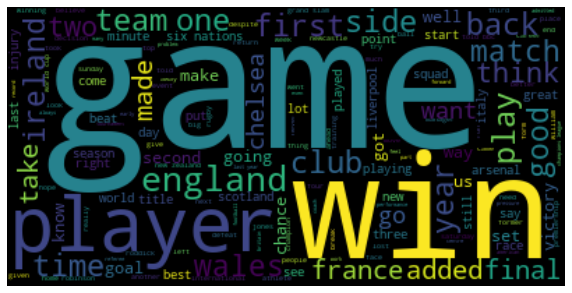

In [109]:
text = " ".join(review for review in df[df['category'] == 'sport']['no_stop_words'])
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

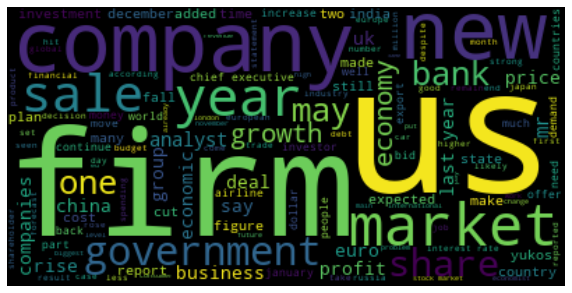

In [110]:
text = " ".join(review for review in df[df['category'] == 'business']['no_stop_words'])
wordcloud = WordCloud(background_color="black").generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Now lets build our model

In [111]:
df.head()

,category,text,no_stop_words
0,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
1,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
2,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
3,sport,henman hopes ended in dubai third seed tim hen...,henman hopes ended dubai third seed tim henman...
4,sport,wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain j...


In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
clf = LogisticRegression()

In [114]:
clf.fit(df['no_stop_words'], df['category'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing 11bn £58bn fraud never made accounting decisions witness told jurors david myers made comments questioning defence lawyers arguing mr ebbers responsible worldcom problems phone company collapsed 2002 prosecutors claim losses hidden protect firm shares mr myers already pleaded guilty fraud assisting prosecutors monday defence lawyer reid weingarten tried distance client allegations cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom books mr weingarten pressed replied witness mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan defence lawyers trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house cards mr ebbers team meanwhile looking portray affable boss admission pe graduate economist whatever abilities mr ebbers transformed worldcom relative unknown 160bn telecoms giant investor darling late 1990s worldcom problems mounted however competition increased telecoms boom petered firm finally collapsed shareholders lost 180bn 20 000 workers lost jobs mr ebbers trial expected last two months found guilty former ceo faces substantial jail sentence firmly declared innocence'

## Doesn't work!  

We need to convert the strings to something numerical 

## Bag of Words 

https://www.google.com/search?q=bag+of+words&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiBgPCsrrjmAhUBUK0KHTycAFQQ_AUoAXoECBMQAw&biw=1426&bih=717#imgrc=GZ8xUuY7Nm35mM:

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
countV = CountVectorizer()

In [117]:
bow = countV.fit_transform(df['no_stop_words'])

In [118]:
df_bow = pd.DataFrame(bow.toarray(), columns=countV.get_feature_names())

In [120]:
clf.fit(df_bow, df['category'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
clf.score(df_bow, df['category'])

1.0

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(df['no_stop_words'], df['category'],
                                                    test_size=0.33, random_state=42)

In [124]:
X_train

814    radcliffe compete london paula radcliffe compe...
212    benitez issues warning gerrard liverpool manag...
79     greek sprinters suspended iaaf greek sprinters...
148    faultless federer equal roger federer nice blo...
302    wales silent grand slam talk rhys williams say...
                             ...                        
106    navratilova hits critics martina navratilova d...
270    barbarians 1947 new zealand new zealand proved...
860    german economy rebounds germany economy bigges...
435    irish markets reach alltime high irish shares ...
102    alfa romeos get gm engines fiat stop making si...
Name: no_stop_words, Length: 684, dtype: object

In [125]:
countV = CountVectorizer()

In [127]:
X_train_bow = countV.fit_transform(X_train)
X_test_bow = countV.transform(X_test)

In [129]:
clf.fit(X_train_bow, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
clf.score(X_train_bow, y_train)

1.0

In [131]:
clf.score(X_test_bow, y_test)

0.9940652818991098

In [132]:
feature_to_coef = {
    word: coef for word, coef in zip(
        countV.get_feature_names(), clf.coef_[0]
    )
}

In [135]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:25]:
    print (best_positive)

('win', 0.3377321698379316)
('game', 0.3290510696619095)
('athletics', 0.3173714779168879)
('club', 0.3097509550376482)
('cup', 0.3030577887720538)
('match', 0.29551939380379505)
('players', 0.285132326122957)
('injury', 0.25850779411968206)
('season', 0.24712259152567348)
('chelsea', 0.24265683260473556)
('team', 0.24157825068781502)
('play', 0.23507061272225213)
('player', 0.22140403190725091)
('open', 0.22126005784729885)
('world', 0.21853410912324273)
('coach', 0.2166093725969117)
('international', 0.21651916348930653)
('side', 0.21581294201014734)
('great', 0.21554963052229467)
('olympic', 0.20917059711730326)
('manager', 0.20569513029935618)
('champion', 0.20142283663130758)
('rugby', 0.20114532904418236)
('got', 0.1990358077332955)
('like', 0.19613279109057916)


In [136]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=False)[:25]:
    print (best_negative)

('mr', -0.5053295473596467)
('firm', -0.42507691169668216)
('company', -0.40228955101890496)
('bank', -0.35222186118484544)
('market', -0.35199229933642734)
('us', -0.3509904137481052)
('shares', -0.29278519325018637)
('government', -0.2916157796333868)
('oil', -0.24667430162996518)
('economy', -0.24379289138310448)
('growth', -0.23665200158501337)
('sales', -0.22820652995573934)
('financial', -0.22687923348130398)
('companies', -0.22433903899648205)
('business', -0.22015216502606635)
('saudi', -0.21084784381580268)
('2004', -0.2033712556385389)
('india', -0.1991003065561041)
('group', -0.18253586805719516)
('demand', -0.18030272308479858)
('however', -0.17792326639970762)
('prices', -0.1753399425061755)
('million', -0.1741024692767764)
('countries', -0.1737971401102493)
('analysts', -0.1732450437388862)


#### TF-IDF 

https://learn.co/tracks/data-science-career-v2/module-6-natural-language-processing-and-deep-learning/section-43-foundations-of-natural-language-processing/nlp-and-word-vectorization

Idea that words that show up rarely are more important than words that show up a lot 

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()

In [145]:
X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)

In [146]:
clf.score(X_train_tfidf, y_train)

0.8406432748538012

In [147]:
clf.score(X_test_tfidf, y_test)

0.7804154302670623

In [148]:
feature_to_coef = {
    word: coef for word, coef in zip(
        v.get_feature_names(), clf.coef_[0]
    )
}

In [149]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:25]:
    print (best_positive)

('he', 0.3989329132233084)
('his', 0.30082744980440074)
('match', 0.275411215604502)
('cup', 0.2707334287165737)
('but', 0.26652351905460675)
('her', 0.2556676814319414)
('win', 0.25043618112657584)
('she', 0.24735100572629193)
('world', 0.23807836511804958)
('rugby', 0.23309539313744626)
('we', 0.23201734865211318)
('game', 0.2256161731238828)
('players', 0.21093556120949916)
('club', 0.21047033515537855)
('after', 0.20799107584135576)
('athletics', 0.1975021350994061)
('won', 0.19544172237238147)
('old', 0.18971553103732638)
('what', 0.18079890711372665)
('season', 0.1766409046316894)
('who', 0.17289837732485946)
('international', 0.16949947641075816)
('chelsea', 0.16930366372225716)
('race', 0.1648369489184465)
('my', 0.16374663814789175)


In [150]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=False)[:25]:
    print (best_negative)

('mr', -0.4820262567549824)
('its', -0.39550061844900836)
('of', -0.3389899198133234)
('said', -0.2867075048695365)
('bank', -0.26556599617245075)
('firm', -0.25285814017141095)
('company', -0.2367501648106502)
('market', -0.21686568751543933)
('us', -0.21154514676512276)
('government', -0.19667495324444795)
('saudi', -0.19557603160683598)
('business', -0.1752923742575412)
('economy', -0.17261485242894917)
('growth', -0.1722252574239453)
('shares', -0.17049379240022192)
('which', -0.1700050317250116)
('oil', -0.16926029850831334)
('companies', -0.15742885566740128)
('than', -0.1539088178723573)
('financial', -0.14957825987682943)
('more', -0.1479864586898039)
('sales', -0.1380283345078019)
('however', -0.1321926823265461)
('foreign', -0.13218458009763562)
('by', -0.13070672127542213)
